# 3.

## a)

Probably not the best way to interpret the cateogries (it would be better instead of having $y$ be a single value it can be a vector of three acting as booleans for each category so that `[1 0 0]` indicates that the example belongs to the first category). But we could give each category an associated number, in this case -1,0, and 1. And then when we use our weights we find from least square to classify a new example then above 0.5 means the predicted label is 1, above -0.5 and below 0.5 means the predicted label is 0, and else it would be -1.

In [1]:
# STARTER CODE
import numpy as np
import scipy.io
import numpy.linalg as la
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy.matlib as mat

# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']

species = data['species']
species = species.flatten()

# YOUR CODE BELOW (process and assign numerical values to ‘y‘ according
# ,→ to your (a), make sure ‘y‘ is a 1d numpy array. If dimensions are
# ,→ mismatching, you may find ‘y = y.flatten()‘ useful )

y = np.zeros(len(species))

for idx, label in enumerate(species):
    if label[0] == 'setosa':
        y[idx] = 1
    elif label[0] == 'versicolor':
        y[idx] = -1
    
# number of random trials
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40;
for i in np.arange(1, N+1):
    # for each experiment, randomly pick training and holdout sets
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    for label_type in range(3):
        r = np.random.permutation(50)
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))
        # divide data and labels into subsets
    Xt = X[idx_train, :]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    w = la.inv(Xt.T@Xt)@Xt.T@yt
    y_tilde = Xh@w
    y_hat = np.where(y_tilde > 0.5, 1, np.where(y_tilde >= -0.5, 0, -1))
    trial_err = (yh - y_hat != 0).sum()/30
    errs[i-1] = trial_err

print(f"The average error rate is {errs.mean()}")

The average error rate is 0.42545333333333335


## c)

In [2]:
errs = np.zeros((40, N))
# size of training set
max_num_train = 40;
for i in range(40):
    num_train = i + 1;
    for j in range(N):
        # for each experiment, randomly pick training and holdout sets
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)
        for label_type in range(3):
            r = np.random.permutation(50)
            idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
            idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))
        # divide data and labels into subsets
        Xt = X[idx_train, :]
        yt = y[idx_train]
        Xh = X[idx_holdout]
        yh = y[idx_holdout]
        while la.matrix_rank(Xt) < len(Xt[0]):
            Xt = Xt[:,:-1]
            Xh = Xh[:,:-1]
        w = la.inv(Xt.T@Xt)@Xt.T@yt
        y_tilde = Xh@w
        y_hat = np.where(y_tilde > 0.5, 1, np.where(y_tilde >= -0.5, 0, -1))
        avg_err = (yh - y_hat != 0).sum()/len(y_tilde)
        errs[i, j] = avg_err

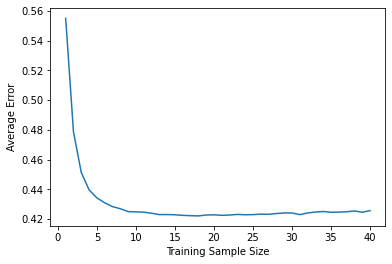

In [3]:
plt.plot(range(1,41),errs.mean(axis=1))
plt.xlabel("Training Sample Size")
plt.ylabel("Average Error")
plt.show()

## d)

In [4]:
X3 = X[:,:3]

N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40;
for i in np.arange(1, N+1):
    # for each experiment, randomly pick training and holdout sets
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    for label_type in range(3):
        r = np.random.permutation(50)
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))
        # divide data and labels into subsets
    Xt = X3[idx_train, :]
    yt = y[idx_train]
    Xh = X3[idx_holdout]
    yh = y[idx_holdout]

    w = la.inv(Xt.T@Xt)@Xt.T@yt
    y_tilde = Xh@w
    y_hat = np.where(y_tilde > 0.5, 1, np.where(y_tilde >= -0.5, 0, -1))
    trial_err = (yh - y_hat != 0).sum()/30
    errs[i-1] = trial_err

print(f"The average error rate is {errs.mean()}")

The average error rate is 0.4334833333333334


## e)

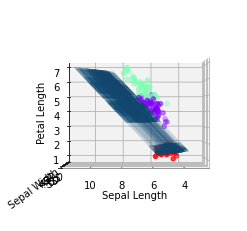

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # 3d plotting
ax.scatter(X3[:,0],X3[:,1], X3[:,2], c=y, cmap="rainbow")
X_2, X_3 = np.meshgrid(X3[:,1], X3[:,2])
X_1 = X_2 + X_3
ax.plot_surface(X_1,X_2,X_3, alpha=0.1)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length');
elevation = 0
azimuth = 90
# rotates 3d scatter plot
ax.view_init(elev=elevation, azim=azimuth)

It looks like a plane defined by the equation $-x_1 + x_2 + x_3= 0$ is pretty close.

## f)

From that equation of the subspace we can use the orthogonal complement `[-1 1, 1]` to create a projection matrix $P$ and project $X$ into that subspace. To make sure the rank of $X_p$ should be 2. 

In [7]:
u = np.array([[-1],[1],[1]])
pt = u@u.T/(u.T@u)
p = np.identity(3) - pt
Xp = (p@X3.T).T
print(f"The projected matrix's rank is {la.matrix_rank(Xp)}")

The projected matrix's rank is 2


With the projected matrix a column will have to be dropped since it is now rank 2. I'll drop the first column and see what the error rate is now.

In [8]:
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40;
for i in np.arange(1, N+1):
    # for each experiment, randomly pick training and holdout sets
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    for label_type in range(3):
        r = np.random.permutation(50)
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))
        # divide data and labels into subsets
    Xt = Xp[idx_train, 1:]
    yt = y[idx_train]
    Xh = Xp[idx_holdout, 1:]
    yh = y[idx_holdout]

    w = la.inv(Xt.T@Xt)@Xt.T@yt
    y_tilde = Xh@w
    y_hat = np.where(y_tilde > 0.5, 1, np.where(y_tilde >= -0.5, 0, -1))
    trial_err = (yh - y_hat != 0).sum()/30
    errs[i-1] = trial_err

print(f"The average error rate is {errs.mean()}")

The average error rate is 0.5047


# 4.
## a).

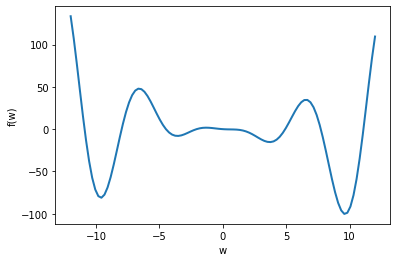

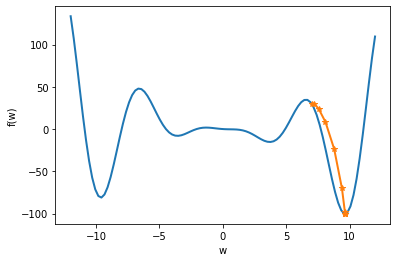

[[7.        ]
 [7.22637712]
 [7.57420145]
 [8.09374818]
 [8.77853737]
 [9.39276833]
 [9.61876285]
 [9.63917741]
 [9.63986316]
 [9.6398834 ]
 [9.63988399]]


In [9]:
def f(w):
    return w*w*np.cos(w)-w

def grad_f(w):
    return 2*w*np.cos(w)-w*w*np.sin(w)-1


n = 100
p = 1
w = np.linspace(-12,12,num=n)
myf = f(w)
plt.plot(w, myf, linewidth=2)
plt.xlabel('w')
plt.ylabel('f(w)')
plt.show()

def gradient_descent(initial_w, tau):
    max_iter = 10
    w_hat = np.matrix(np.zeros((max_iter+1,1)))
    f_hat = np.matrix(np.zeros((max_iter+1,1)))
    w_hat[0] = initial_w # initial value of w
    f_hat[0] = f(w_hat[0]) # corresponding initial value of f
    for k in range(max_iter):
        w_hat[k+1] = w_hat[k] - tau*grad_f(w_hat[k])
        f_hat[k+1] = f(w_hat[k])
    # implement gradient descent here
    # store new w in w_hat[k+1]
    # store new f(w) in f_hat[k+1]
    plt.plot(w,myf,linewidth=2)
    plt.plot(w_hat ,f_hat,'-*',linewidth =2)
    plt.xlabel('w')
    plt.ylabel('f(w)')
    plt.show()
    print(w_hat)
    
gradient_descent(7, 0.01)

We can see from both the graph of f(w) and the progression of w_hat that the value that minimizes f(w) is around 9.64. Of course -9.64 would also work. If we started with -7 instead:

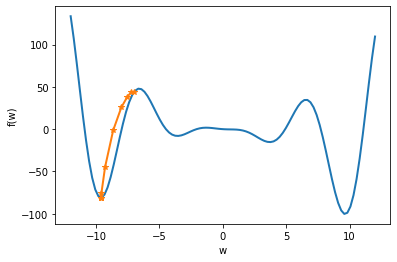

[[-7.        ]
 [-7.20637712]
 [-7.52360108]
 [-8.00022089]
 [-8.64674016]
 [-9.284691  ]
 [-9.57893379]
 [-9.61735301]
 [-9.619124  ]
 [-9.61919096]
 [-9.61919347]]


In [10]:
gradient_descent(-7, 0.01)

So its clear that the starting w matters. In fact this equation has local minimums so if we started in the wrong place (and had the wrong step size more on that in a sec) then we would not find the actual minimum:

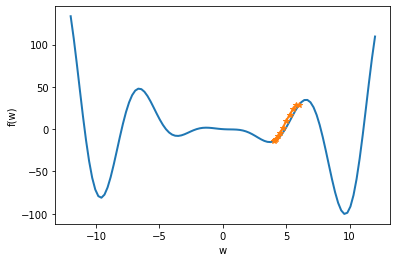

[[6.        ]
 [5.79418999]
 [5.54418332]
 [5.26518888]
 [4.98396476]
 [4.72793074]
 [4.5129549 ]
 [4.34120585]
 [4.20707225]
 [4.10292983]
 [4.02187019]]


In [11]:
gradient_descent(6, 0.01)

In this case because it starts on the wrong side of the hill (so to speak) the gradient will point towards a local minimum. Step size also matters here as it could be both too large to find the minimum:

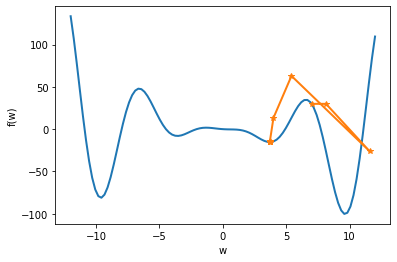

[[ 7.        ]
 [ 8.13188559]
 [11.58449721]
 [ 5.41136454]
 [ 3.99237478]
 [ 3.70648388]
 [ 3.70183624]
 [ 3.70132897]
 [ 3.70127264]
 [ 3.70126638]
 [ 3.70126568]]


In [12]:
gradient_descent(7, 0.05)

Or too small to find it in the number of iterations we use:

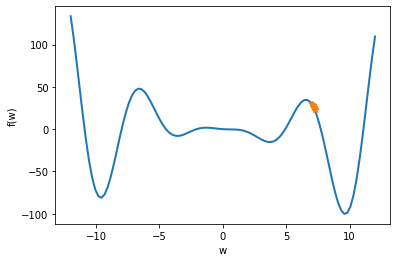

[[7.        ]
 [7.02263771]
 [7.04649474]
 [7.07163782]
 [7.09813648]
 [7.12606291]
 [7.15549165]
 [7.1864993 ]
 [7.21916395]
 [7.25356459]
 [7.28978024]]


In [13]:
gradient_descent(7, 0.001)

## b)

For this $X$ is a 200x6 matrix with each row being a different $x_i$ and each column that $x_i$ to the jth power for j=[0,1,2,3,4,5]. $y$ will be a length 200 vector with each value $y_1$ being $cos(3x_i)$. $w$ will be a vector of length 6 with each $w_j$ being a weight. This being a least squares problem our $f(w) = ||y - Xw||^2_2$ we want the $w$ that minimizes that function.

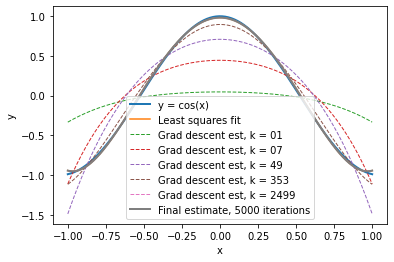

In [14]:
n = 200
x = np.linspace(-1,1,n)
y = np.matrix(np.cos(3*x)).T
X = np.matrix([x**0, x**1, x**2, x**3, x**4, x**5]).T
alt_w_hat = la.inv(X.T@X)@X.T@y
tau = 2.8e-3
max_iter = 5000
w_hat = np.matrix(np.zeros((6,max_iter+1)))
w_hat[:,0] = np.zeros([6,1])
plt.plot(x,y,linewidth =2,label='y = cos(x)')
plt.plot(x,X@alt_w_hat,label='Least squares fit')
plt.xlabel('x')
plt.ylabel('y')

for k in range(max_iter):
    w_hat[:,k+1] = w_hat[:,k] - tau*(2*X.T@(X@w_hat[:,k]-y)) 
## put gradient descent code here
ktype = np.logspace(0,np.log10(max_iter/2),5,base=10).astype(int)
for k in ktype:
    plt.plot(x,X@w_hat[:,k],'--',linewidth=1,label='Grad descent est, k = '+ format(k,'02d'))
plt.plot(x,X@w_hat[:,max_iter],'-',linewidth=2,label='Final estimate, '+ format(max_iter,'02d')+' iterations')
plt.legend()